Diabetes challengeds

## 1.Bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from pathlib import Path
import time

from scipy.stats import ttest_rel

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

from sklearn.base import BaseEstimator, TransformerMixin, clone

# Importações locais
# Importações locais
from setup_notebook import setup_path
setup_path()
from src.model_utils import *
from src.preprocess_utils_diab import *
from src.plot_metrica_class import *

print("\n#Processo iniciado em:", time.strftime("%H:%M:%S"))
start_inicial = time.time()


#Processo iniciado em: 10:59:35


## 2. Dataload & Preprocessamento com joblib


In [6]:
BASE = Path.cwd().parent   
# =====================================================
# ⚙️ 0. carregamento dos preprocessador 
# =====================================================
PP2 = joblib.load(BASE/'src'/'preprocess_diabetes_v1.2.joblib')['preprocessador']


# # =====================================================
# # 📁 1. Leitura dos dados & Separação das bases
# # =====================================================

DATA_DIR = BASE / "data" / "raw"
X_train = pd.read_csv(DATA_DIR / "X_train_raw.csv").reset_index(drop=True)
X_test  = pd.read_csv(DATA_DIR / "X_test_raw.csv")
y_train = pd.read_csv(DATA_DIR / "y_train_raw.csv").values.ravel()
y_test  = pd.read_csv(DATA_DIR / "y_test_raw.csv")
mtd_scoring='roc_auc'

# # =====================================================
# #  🤖 3.Definição dos Modelos
# # =====================================================
model_RF0 = RandomForestClassifier(random_state=42, n_jobs=4)  #Baseline
pipe_RF0      = pipe_models(model_RF0,PP2)


DATA_MODELS= BASE /"models"
pipe_RF1 = joblib.load(DATA_MODELS / 'modelo_RF_final_randsearch.roc_auc_v1.2.joblib')
pipe_RF2 = joblib.load(DATA_MODELS / 'modelo_RF_final_refine.roc_auc_v1.2.joblib')
print("\n#Processo iniciado em:", time.strftime("%H:%M:%S"))



#Processo iniciado em: 11:03:40


In [7]:
print("\n#Processo iniciado em:", time.strftime("%H:%M:%S"))
# Baseline
s0 = cross_val_score(pipe_RF0 , X_train, y_train, cv=2,scoring=mtd_scoring)

# 2. Testa a performance 
pipe_RF0.fit(X_train, y_train)
# 3.Otimização de Threshold
best_t_rf0, score_rf0 = best_threshold(pipe_RF0, X_test, y_test)

y_pred=pipe_RF0.predict(X_test)
print(f"{'='*70}")
print(f"🎯 Random Forest (Baseline) | cvscores : {s0.mean():.4f} ± {s0.std():.4f}")
print(f"{'='*70}")
print(f"📊 **Acurácia no Teste**: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(f"🎯 **Matriz de Confusão**:")
print(f"               Previsto 0   Previsto 1")
print(f"Real 0         {cm[0,0]:<11} {cm[0,1]:<11}")
print(f"Real 1         {cm[1,0]:<11} {cm[1,1]:<11}")
print(f"{'─'*70}")


#Processo iniciado em: 11:03:43
🎯 Melhor Threshold: 0.490
📈 Melhor Acurácia (Test): 0.6625
🎯 Random Forest (Baseline) | cvscores : 0.6889 ± 0.0009
📊 **Acurácia no Teste**: 0.6624

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

         0.0       0.58      0.37      0.45     79108
         1.0       0.69      0.84      0.76    130892

    accuracy                           0.66    210000
   macro avg       0.63      0.60      0.60    210000
weighted avg       0.65      0.66      0.64    210000

🎯 **Matriz de Confusão**:
               Previsto 0   Previsto 1
Real 0         29010       50098      
Real 1         20790       110102     
──────────────────────────────────────────────────────────────────────


In [9]:
print("\n#Processo iniciado em:", time.strftime("%H:%M:%S"))

# RF1
s1= cross_val_score(pipe_RF1 , X_train, y_train, cv=2,scoring=mtd_scoring)

# 2. Testa a performance 
pipe_RF1.fit(X_train, y_train)

# 3.Otimização de Threshold
best_t_rf1, score_rf1 = best_threshold(pipe_RF1, X_test, y_test)

y_pred=pipe_RF1.predict(X_test)
print(f"{'='*70}")
print(f"🎯 Random Forest 1 | cvscores : {s1.mean():.4f} ± {s1.std():.4f}")
print(f"{'='*70}")
print(f"📊 **Acurácia no Teste**: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(f"🎯 **Matriz de Confusão**:")
print(f"               Previsto 0   Previsto 1")
print(f"Real 0         {cm[0,0]:<11} {cm[0,1]:<11}")
print(f"Real 1         {cm[1,0]:<11} {cm[1,1]:<11}")
print(f"{'─'*70}")
print("\n#Processo finalizado em:", time.strftime("%H:%M:%S"))



#Processo iniciado em: 11:08:10
🎯 Melhor Threshold: 0.540
📈 Melhor Acurácia (Test): 0.6623
🎯 Random Forest 1 | cvscores : 0.6934 ± 0.0011
📊 **Acurácia no Teste**: 0.6523

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

         0.0       0.65      0.17      0.27     79108
         1.0       0.65      0.94      0.77    130892

    accuracy                           0.65    210000
   macro avg       0.65      0.56      0.52    210000
weighted avg       0.65      0.65      0.58    210000

🎯 **Matriz de Confusão**:
               Previsto 0   Previsto 1
Real 0         13543       65565      
Real 1         7446        123446     
──────────────────────────────────────────────────────────────────────

#Processo finalizado em: 11:23:16


In [10]:
print("\n#Processo iniciado em:", time.strftime("%H:%M:%S"))

#RF 2
s2= cross_val_score(pipe_RF2 , X_train, y_train, cv=2,scoring='roc_auc')

# 2. Testa a performance 
pipe_RF2.fit(X_train, y_train)

# 3.Otimização de Threshold
best_t_rf2, score_rf2 = best_threshold(pipe_RF2, X_test, y_test)

y_pred=pipe_RF2.predict(X_test)
print(f"{'='*70}")
print(f"🎯 Random Forest 2 | cvscores : {s2.mean():.4f} ± {s2.std():.4f}")
print(f"{'='*70}")
print(f"📊 **Acurácia no Teste**: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n📋 **Relatório de Classificação**:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(f"🎯 **Matriz de Confusão**:")
print(f"               Previsto 0   Previsto 1")
print(f"Real 0         {cm[0,0]:<11} {cm[0,1]:<11}")
print(f"Real 1         {cm[1,0]:<11} {cm[1,1]:<11}")
print(f"{'─'*70}")
print("\n#Processo finalizado em:", time.strftime("%H:%M:%S"))



#Processo iniciado em: 11:24:42
🎯 Melhor Threshold: 0.550
📈 Melhor Acurácia (Test): 0.6626
🎯 Random Forest 2 | cvscores : 0.6932 ± 0.0010
📊 **Acurácia no Teste**: 0.6517

📋 **Relatório de Classificação**:
              precision    recall  f1-score   support

         0.0       0.65      0.16      0.26     79108
         1.0       0.65      0.95      0.77    130892

    accuracy                           0.65    210000
   macro avg       0.65      0.56      0.52    210000
weighted avg       0.65      0.65      0.58    210000

🎯 **Matriz de Confusão**:
               Previsto 0   Previsto 1
Real 0         12985       66123      
Real 1         7021        123871     
──────────────────────────────────────────────────────────────────────

#Processo finalizado em: 11:40:50


In [11]:
# relatório automatico
# Calcula os scores de validação cruzada para cada modelo(acc)
s0_acc = cross_val_score(pipe_RF0, X_train, y_train, cv=2)
s1_acc = cross_val_score(pipe_RF1, X_train, y_train, cv=2)
s2_acc = cross_val_score(pipe_RF2, X_train, y_train, cv=2)

score0 = pipe_RF0.score(X_test, y_test)
score1 = pipe_RF1.score(X_test, y_test)
score2 = pipe_RF2.score(X_test, y_test)

y_prob0 = pipe_RF0.predict_proba(X_test)[:, 1]
y_prob1 = pipe_RF1.predict_proba(X_test)[:, 1]
y_prob2 = pipe_RF2.predict_proba(X_test)[:, 1]


# # 1. Preparação dos Dados de Performance
models_list = [
    ('Modelo 0 ( Base )', pipe_RF0, s0, s0_acc, y_prob0, best_t_rf0),
    ('Modelo 1 (Random)', pipe_RF1, s1, s1_acc, y_prob1, best_t_rf1),
    ('Modelo 2 (Refine)', pipe_RF2, s2, s2_acc, y_prob2, best_t_rf2),
]

df_results,W = gerar_relatorio_estatistico(models_list,X_train, y_train,X_test, y_test)

                      RELATÓRIO DE DESEMPENHO E ESTABILIDADE ESTATÍSTICA                       
      Modelo         CV ROC-AUC        CV ACC       Test ROC-AUC   Test ACC (0.5)   Best Thresh    Test ACC (Opt)
Modelo 0 ( Base ) 0.6889 ± 0.0009 0.6609 ± 0.0001      0.6905          0.6624          0.490           0.6625    
Modelo 1 (Random) 0.6934 ± 0.0011 0.6528 ± 0.0004      0.6931          0.6523          0.540           0.6623    
Modelo 2 (Refine) 0.6932 ± 0.0010 0.6521 ± 0.0003      0.6930          0.6517          0.550           0.6626    

                     ANÁLISE DE SIGNIFICÂNCIA ESTATÍSTICA (T-TEST PAREADO)                     
Modelo 1 (Random) vs Modelo 2 (Refine): p-value = 0.1800 | Diferença Significativa? NÃO

                                 CONCLUSÃO TÉCNICA AUTOMÁTICA                                  
1. VENCEDOR: Modelo 1 (Random)
   - Ganho real sobre o Baseline: +0.0026 em Test ROC-AUC.

2. ESTABILIDADE E SIGNIFICÂNCIA:
   - A melhoria em relação ao Baseline é e

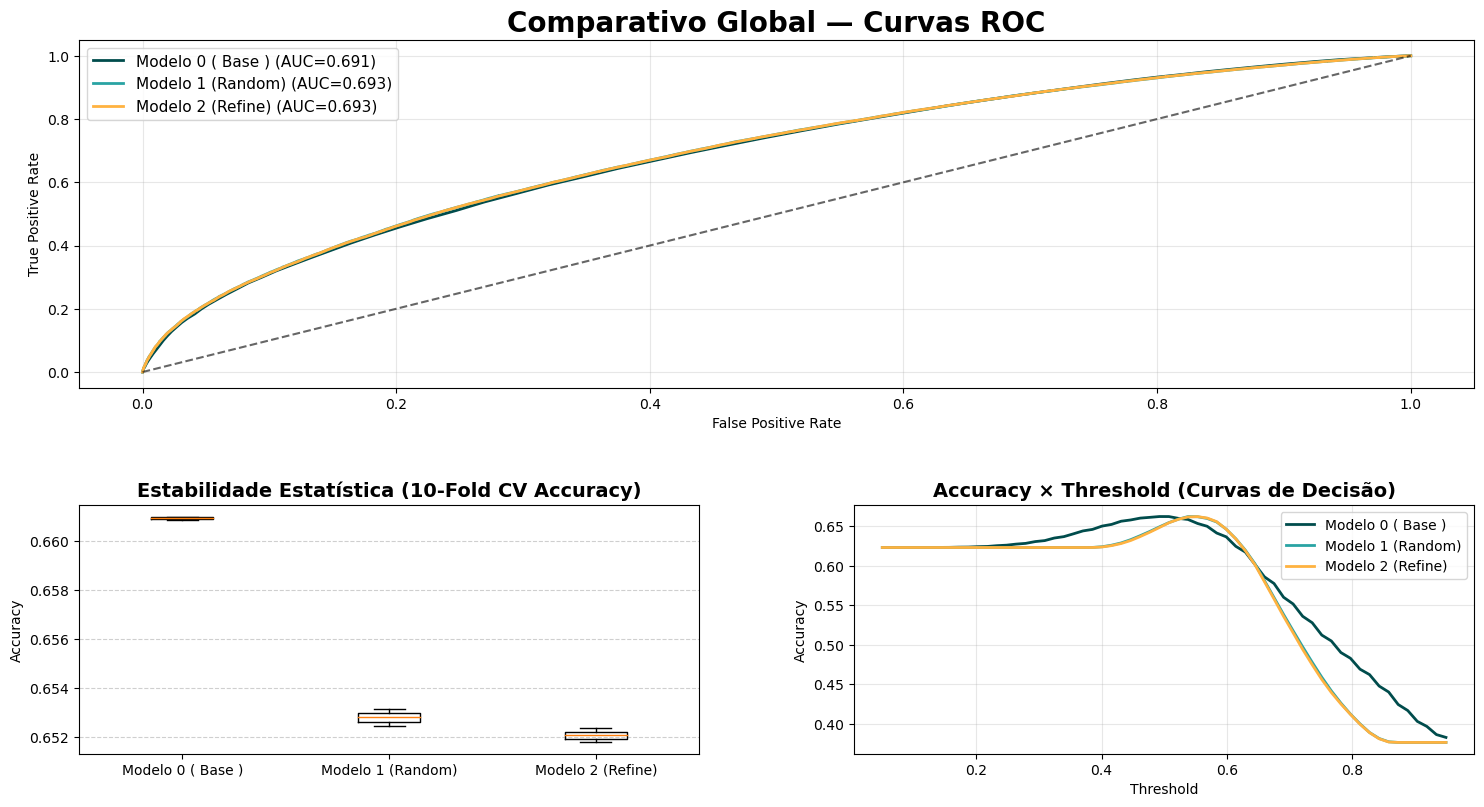

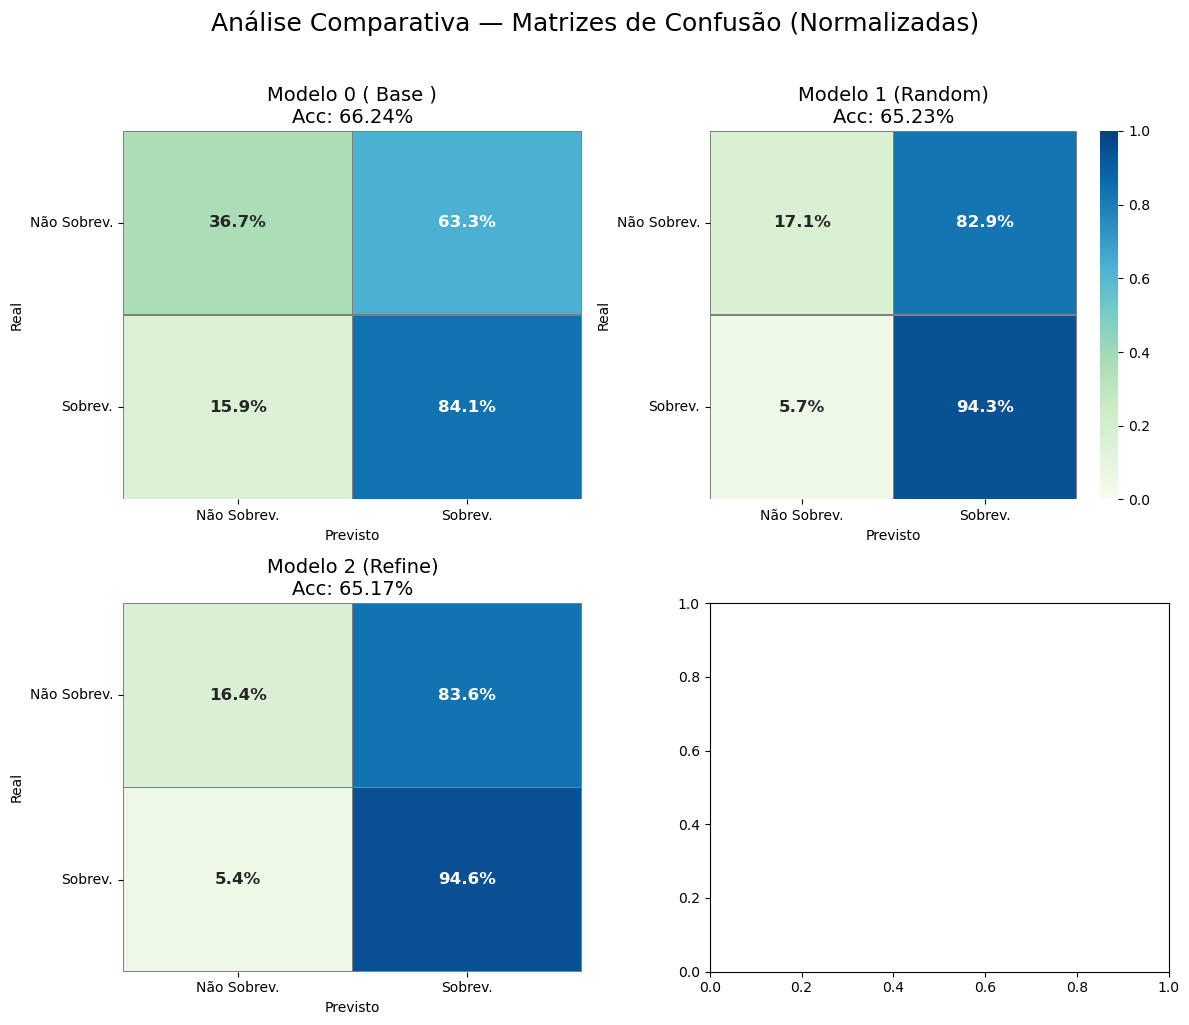

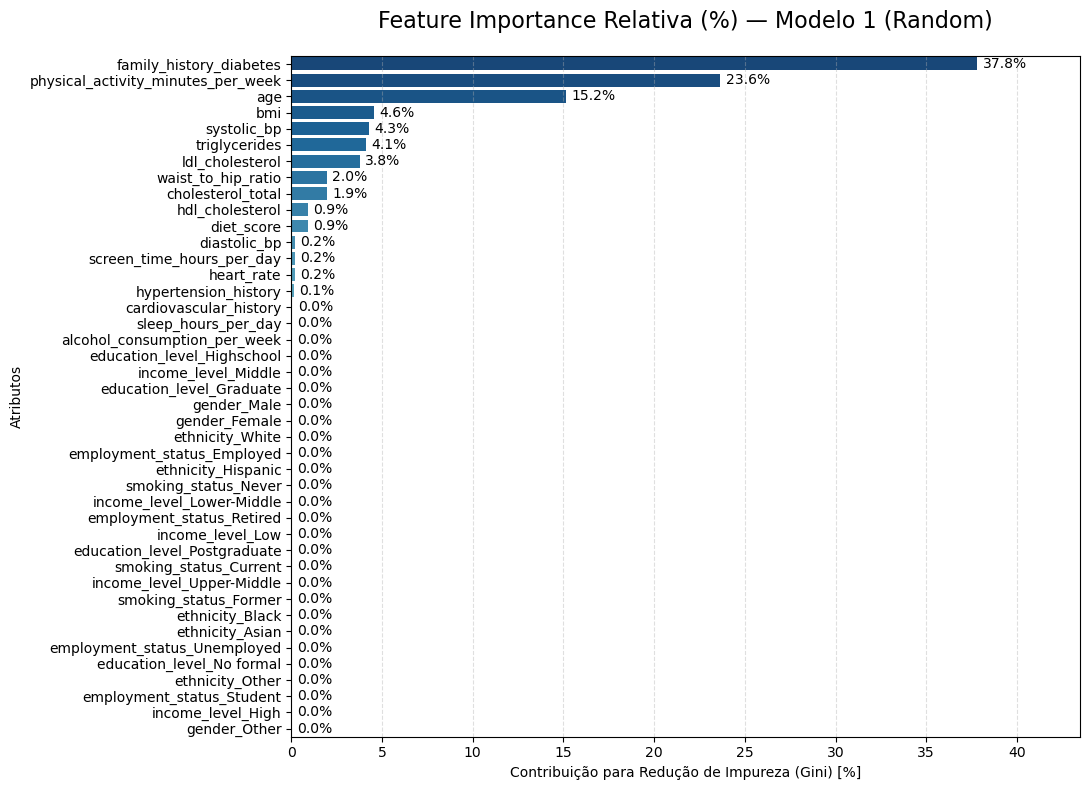


#Processo finalizado em: 11:56:45


In [12]:
#plotagem dos resultados
importances=model_evaluation_grid(
    models_list=models_list,
    X_test=X_test,
    y_test=y_test,
    best_model_pipeline=W[1],
    best_model_name=W[0]
)